<a href="https://colab.research.google.com/github/programmerruchiyadav/Airbnb-Data-Analysis/blob/main/Individual_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#importinng the libraries for dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#file reading of dataset
df = pd.read_csv('/content/drive/MyDrive/Almabetter/EDA-Project1/Airbnb NYC 2019.csv')

In [ ]:
# top 10 rows of the data 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#defining the columns in the given dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Checking the size of the data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

In [ ]:
#Finding the unique values in dataset
print(' \nUnique:\n',df.nunique())


 
Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [ ]:
#Cleaning the datset with finding the null values in each columns
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Replacing Nan with 0**

In [ ]:
#Replacing Null value with 0 
df.fillna({'reviews_per_month':0, 'last_review':0,'name':0,'host_name':0},inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
print('unique value for room_type are:',df.room_type.unique())
print('unique value for neighbourhood_group are:',df.neighbourhood_group.unique())

unique value for room_type are: ['Private room' 'Entire home/apt' 'Shared room']
unique value for neighbourhood_group are: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


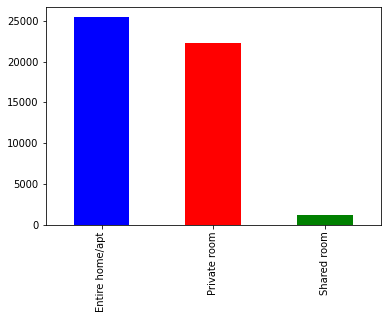

In [ ]:
df['room_type'].value_counts().plot(kind = 'bar',color = ['b','r','g'])
plt.show()

**Top 10 Apartments given below:** 

In [ ]:
#Top 10 Entire home/apt 
apt = df[df['room_type'] == 'Entire home/apt']
list_apt = apt.groupby(['host_id', 'host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending = False)
list_apt.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,apartment
20219,219517861,Sonder (NYC),Financial District,Manhattan,210
6452,7503643,Vida,Greenpoint,Brooklyn,52
8434,12243051,Sonder,Financial District,Manhattan,51
20222,219517861,Sonder (NYC),Murray Hill,Manhattan,50
17840,120762452,Stanley,Murray Hill,Manhattan,49
19908,205031545,Red Awning,Midtown,Manhattan,49
12278,30283594,Kara,Hell's Kitchen,Manhattan,41
17458,107434423,Blueground,Chelsea,Manhattan,37
17635,113805886,Yaacov,Upper East Side,Manhattan,33
12280,30283594,Kara,Midtown,Manhattan,33


**Top 10 Private rooms**

In [ ]:
#Top 10 Private Rooms
private = df[df['room_type'] == 'Private room']
pvt_list = private.groupby(['host_id', 'host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='private').sort_values(by=['private'],ascending = False)
pvt_list.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,private
15270,190921808,John,Hell's Kitchen,Manhattan,44
14032,137358866,Kazuya,Woodside,Queens,35
16311,238321374,Eyal,Upper West Side,Manhattan,32
15993,224414117,Gabriel,Hell's Kitchen,Manhattan,30
16044,226410657,Nina,Bedford-Stuyvesant,Brooklyn,26
16154,230192510,Zach,Fort Greene,Brooklyn,25
16396,242962235,Yuval,Ridgewood,Queens,23
16549,252604696,Erin,Chelsea,Manhattan,20
14668,159091490,Melissa,Gowanus,Brooklyn,17
14031,137358866,Kazuya,Sunnyside,Queens,17


**Top Shared Rooms**


In [ ]:
#Top 10 Shared Rooms
sharing = df[df['room_type'] == 'Shared room']
sharing_list = sharing.groupby(['host_id', 'host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='sharing').sort_values(by=['sharing'],ascending = False)
sharing_list.head(10)

,host_id,host_name,neighbourhood,neighbourhood_group,sharing
339,39528519,Max,Lower East Side,Manhattan,23
529,119669058,Melissa,Bedford-Stuyvesant,Brooklyn,18
651,201015598,Anchor,Bedford-Stuyvesant,Brooklyn,17
618,175730239,Baboucarr,Sunnyside,Queens,10
663,209386156,Abraham,East Harlem,Manhattan,9
727,253906467,Erik,Hell's Kitchen,Manhattan,9
686,223087887,Jess & Ana,Corona,Queens,8
714,248161322,Sergii,Bushwick,Brooklyn,8
292,30509656,Orit,Port Morris,Bronx,8
635,187975743,R.Henry,Hell's Kitchen,Manhattan,8


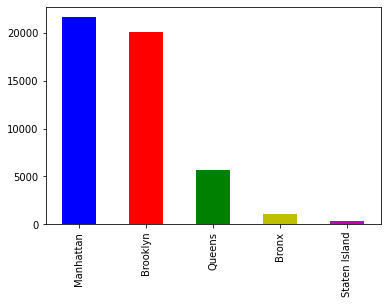

In [ ]:
#plotting of data in bar graph according to neighbourhood group 
df['neighbourhood_group'].value_counts().plot(kind = 'bar',color = ['b','r','g','y','m'])
plt.show()


Which 5 host has most number of reviews?

Based on the review score(Minimum 50) we will see who is our top 5 Host, this increases the confidence of tourist before booking.

We have total 48874 hosts out of them 7075 hosts have reviw count greater than 50.Now we will get Top 5 host who have most number of reviews.

We can say that Michael has received more reviews after David and .

In [ ]:
#checking top 5 Host which has most number of listing
df1 = df['host_name'].count()
df1

48895

In [ ]:
review_50 = df[df['number_of_reviews']>=50]
df1 = review_50['host_name'].count()
df1

7081

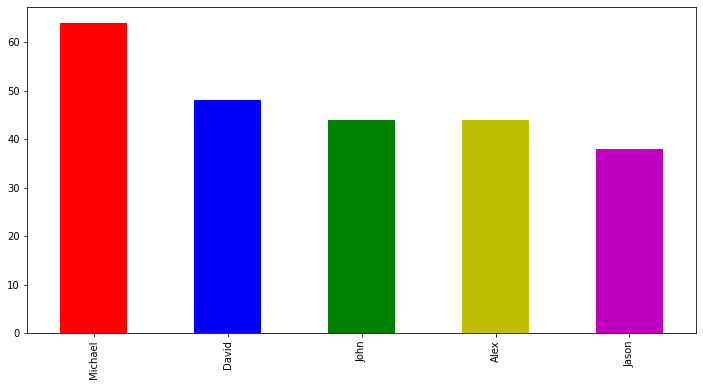

In [ ]:
plt.figure(figsize=(12,6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])


**Observation:**
From above result, we can conclude that the name of the Host with most no. of listings is Michael.

# **Exploratory Data Analysis**

**Question 1.** Which neighbourhood group has most number of grouping.

In [ ]:
# Checking which neighbourhood group has most no of listing
neighbour_grp =df.groupby(['neighbourhood_group']).count()['calculated_host_listings_count'].reset_index().rename(columns={'calculated_host_listings_count':'no_of_listings'})
neighbour_grp = neighbour_grp.sort_values(by=['no_of_listings'], ascending=False)
neighbour_grp

,neighbourhood_group,no_of_listings
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


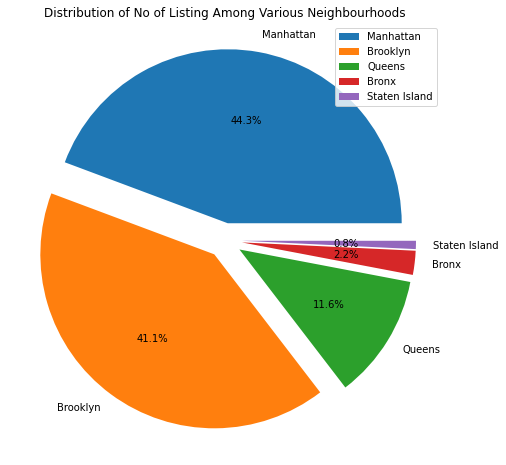

In [ ]:
# Visualizing the neighbourhood group which has most no of listing
plt.figure(figsize=(12,8))
plt.pie(neighbour_grp['no_of_listings'],labels = neighbour_grp['neighbourhood_group'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1])
plt.title("Distribution of No of Listing Among Various Neighbourhoods")
plt.legend()



From the above obseravtion we can conclude that we have highest number of listing i.e. **44.3%**

**Question 2.** Which room type is prefered in most popular neighbourhood?

From above analysis we already know that manhattan is most popular neighbourhood group. Hence we will only look for popular neighbourhood in Manhattan

In [ ]:
# From above analysis we already know that manhattan is most popular neighbourhood group 
# Now lets find the most popular neighbourhood in Manhattan
manhattan_df = df[df['neighbourhood_group'] == 'Manhattan'] # Filtering entire data on neighborhood_group = Manhattan
manhattan_df.value_counts('neighbourhood')                                    # Finding unique values in neighbourhood of Manhattan

neighbourhood
Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             485
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
dtype: int64

From above obseravtion we got to know that **Harlem** is the most popular neighbourhood in Manhattan.

In [ ]:
# lets find the prefered room type in most popular neibhourhood 
harlem_df = manhattan_df[manhattan_df['neighbourhood'] == 'Harlem']
harlem_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
31,9704,Spacious 1 bedroom in luxe building,32045,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,2019-06-14,1.42,1,255
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
44,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,2019-06-13,0.84,1,309


In [ ]:
# we look for prefered room type in most popular neibourhood.
popular_room_type_df = harlem_df.groupby(['neighbourhood','room_type']).count().reset_index()
popular_room_type_df

,neighbourhood,room_type,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Harlem,Entire home/apt,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
1,Harlem,Private room,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
2,Harlem,Shared room,49,49,49,49,49,49,49,49,49,49,49,49,49,49


Text(0.5, 1.0, 'Prefered Room Type in Popular Neighbourhood')

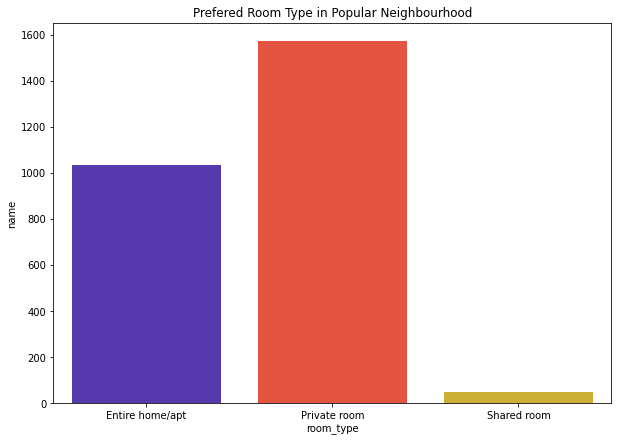

In [ ]:
# Graphical Representation of prefered room type
plt.figure(figsize=(10,7))

sns.barplot(x="room_type",y="name",data =popular_room_type_df,palette='CMRmap')
plt.title("Prefered Room Type in Popular Neighbourhood")

From the above observation it is cleared that most of people prefered **private room type** for stay. 

**Question 3.** Percentage share of price among various neighbourhood groups.

In [ ]:
# Find percentage share by each neighbourhood group
price_dist = df.groupby(["neighbourhood_group"]).sum()["price"].reset_index()
price_dist = price_dist.sort_values(by = ["price"],ascending=False)
price_dist["percentage_share"] = round((price_dist["price"]/price_dist["price"].sum())*100,2)
price_dist

,neighbourhood_group,price,percentage_share
2,Manhattan,4264527,57.11
1,Brooklyn,2500600,33.49
3,Queens,563867,7.55
0,Bronx,95459,1.28
4,Staten Island,42825,0.57


Text(0.5, 1.0, 'Percentage Share by neighbourhood group')

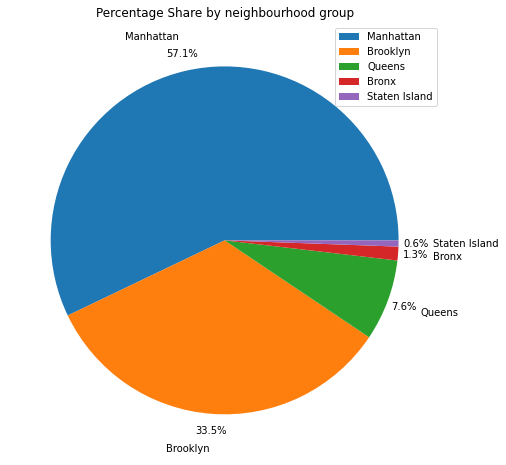

In [ ]:
#Percentage share by each neighbourhood group through pie chart
plt.figure(figsize=(12,8))
plt.pie(price_dist["price"],labels=price_dist["neighbourhood_group"],autopct="%1.1f%%", pctdistance=1.1, labeldistance=1.2)
plt.legend()
plt.title("Percentage Share by neighbourhood group")

From the above observation we can concluse that **Manhattan** and **Brooklyn** contribute to 90.6% of Total listing price.

**Question 4.** Show the neighbourhood group based on latitude and longitude.

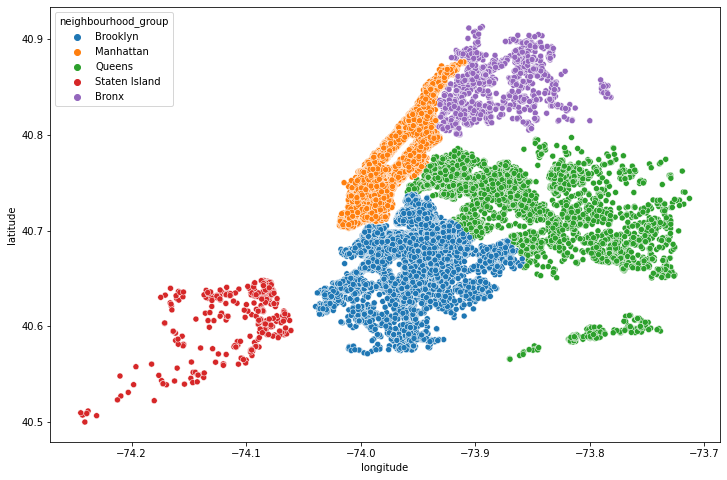

In [ ]:
# we will put the data of longitude and latitude in scatter plot diagram for clarification of loaction
plt.figure(figsize = (12,8))
sns.scatterplot(x = df.longitude, y = df.latitude, hue =df.neighbourhood_group)
plt.show()

**Question 5.**On an Average for how many minimum_nights people stayed in each room_type.

In [ ]:
#Lets find Average for how many minimumn_nights played stayed in room_type
avg_night_stay = df.groupby(["room_type"]).mean()["minimum_nights"].reset_index().rename(columns = {"minimum_nights":"average_night_stay"})

avg_night_stay

,room_type,average_night_stay
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


Text(0.5, 1.0, 'Relationship Between Room Type and Average Night Stay ')

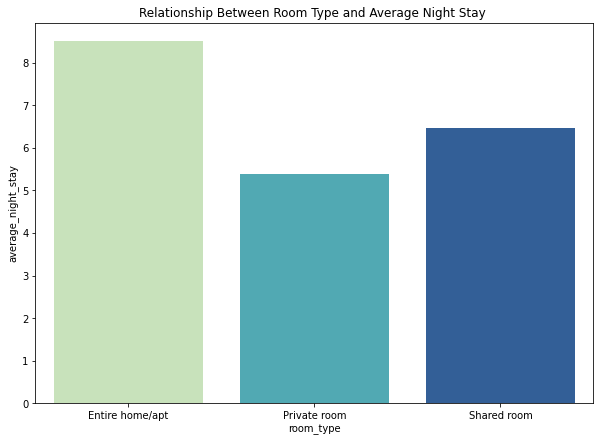

In [ ]:
# Bar chart for room_type vs average_night_stay
plt.figure(figsize=(10,7))
sns.barplot(x="room_type",y="average_night_stay",data=avg_night_stay,palette="YlGnBu")
plt.title("Relationship Between Room Type and Average Night Stay ")

If someone is booking **Entire home/apt** , They tend to stay for longer duration on an average 8 to 9 days.
For **private room** on an average of 5 to 6 days.
For **shared room** on an average of 6 to 7 days.

**Question 6.** Check how price based on availability get increased during whole year.


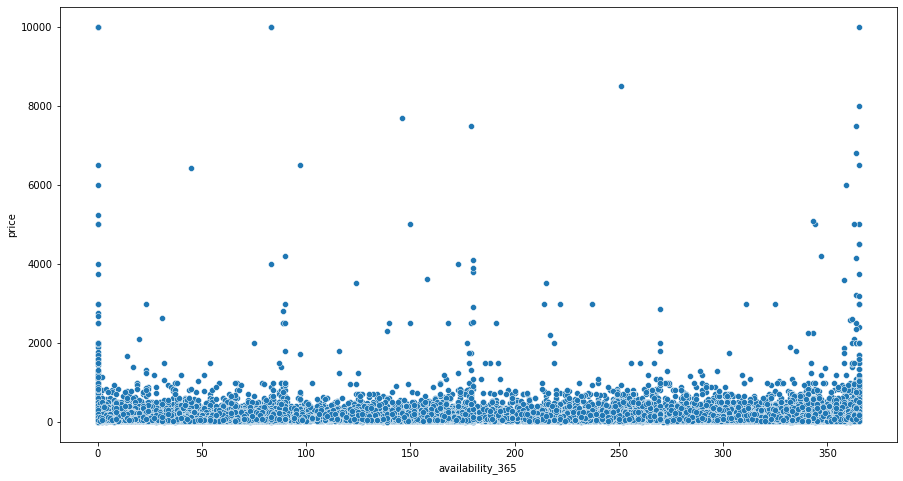

In [ ]:
#For better understanding we can check the prices which got increased with the help of scatterplot presentation
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])

From the above observation we can conclude that price got increased upto 10k.

**Question 7.** Top 10 expensive properties in New York Cities (NYC)

In [ ]:
#Finding top 10 expensive properties from the given data
top_10_expensive_properties = df.sort_values(by = ['price'],ascending = False).head(10)
top_10_expensive_properties[['name','price']]

,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999
6530,Spanish Harlem Apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4377,Film Location,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),7703
42523,70' Luxury MotorYacht on the Hudson,7500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

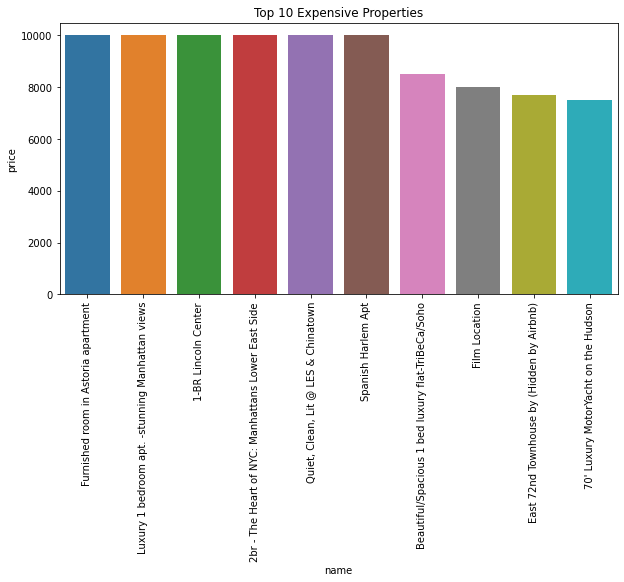

In [ ]:
# visual representation of expensive properties
plt.figure(figsize=(10,5))

sns.barplot(x="name",y="price",data = top_10_expensive_properties)
plt.title("Top 10 Expensive Properties")
plt.xticks(rotation=90)